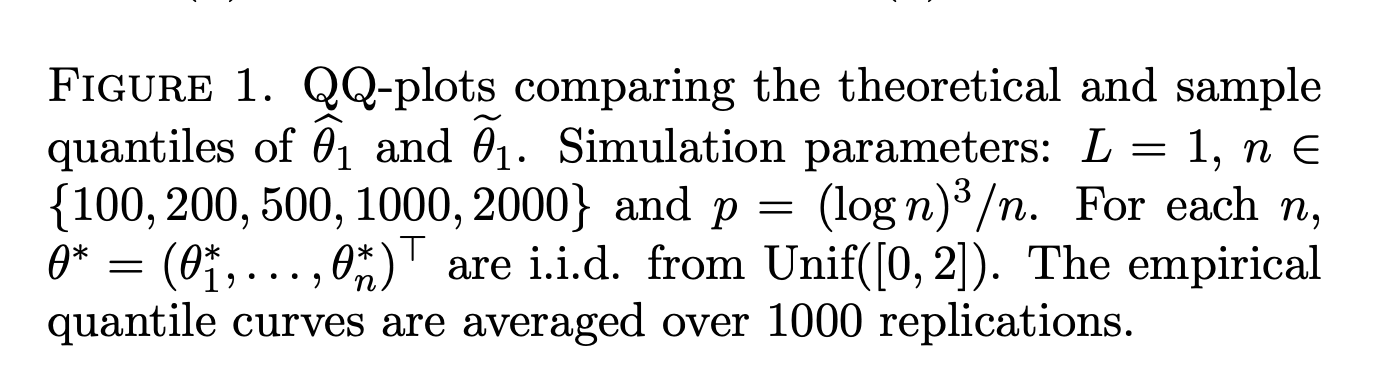


In [3]:
%load_ext autoreload
%autoreload 2

In [39]:
from btl_func import *
from btl_func_g import *
from data import *
from optim import GradientDescent
import estimate

In [ ]:
from utils import normalize
from matplotlib import pyplot as plt


def check_E_L():

    data = GaoData(2, 1, 5, (-1, 1))
    print("data.v", data.v)

    v_star, log_f, log_iters = GradientDescent(
        lambda v: -calc_E_L_grad(data, v),
        np.random.rand(data.p),
        alpha=1e-3,
        max_iter=100,
        f=lambda v: -calc_E_L(data, v),
        verbose_iter=1,
    )

    print("norm v_star", normalize(v_star))

    print("norm real v", normalize(data.v))

    assert np.allclose(normalize(v_star), normalize(data.v), atol=1e-3)

    print("grad at true", calc_E_L_grad(data, data.v))
    print("grad at star", calc_E_L_grad(data, v_star))

    plt.plot(log_iters, log_f)
    plt.title("-E_L")
    plt.xlabel("iteration")
    plt.ylabel("-E_L")
    plt.show()


check_E_L()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 64478.16it/s]

norm v_star [ 0.28638262 -0.28638262]
norm real v [ 0.85229637 -0.85229637]


AssertionError: 

In [41]:
from estimate import calc_v_star, calc_v_g_star

  5%|▌         | 52/1000 [00:00<00:00, 109489.86it/s]

gradient at true [0. 0.]
gradient at star [ 4.89964170e-07 -4.89964171e-07]
v_star [ 0.10288503 -0.10288503]
v_true [ 0.10288513 -0.10288513]


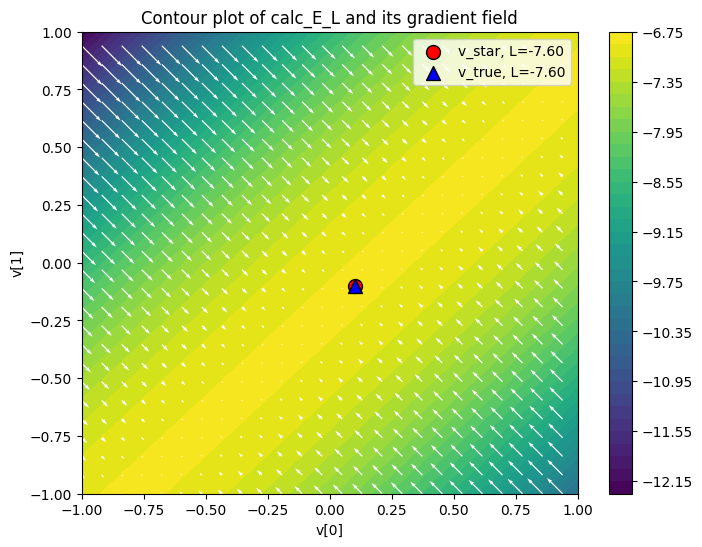

In [110]:
def plot_E_L(data):
    v_true = normalize(data.v)
    v_star = normalize(calc_v_star(data))
    # v_g_star = normalize(calc_v_g_star(data, 1))

    print("gradient at true", calc_E_L_grad(data, data.v))
    print("gradient at star", calc_E_L_grad(data, v_star))
    print("v_star", v_star)
    print("v_true", v_true)
    assert np.allclose(v_star, v_true, atol=1e-3)

    lin = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_E_L(data, v_point)
            grad = calc_E_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_true[0],
        v_true[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_true, L={calc_L(data, v_true):.2f}",
    )

    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("Contour plot of calc_E_L and its gradient field")
    plt.legend()
    plt.show()


data = GaoData(2, 0.5, 10, (-1, 1))
plot_E_L(data)

In [ ]:
class ContsEstimation:
    def __init__(self, data: GaoData, g_l: float):
        self.data = data
        self.g_l = g_l
        self.F = F(data.v, data.N)
        assert np.allclose(F_slow(data.v, data.N), self.F)

        self.v_g = self.find_v_g()
        self.Fg = F_g(self.v_g, data, g_l)

    def find_v_g(self):
        v_g = self.data.v.copy()

100%|██████████| 100/100 [00:00<00:00, 178253.46it/s]

true v is  [0.46943722 0.6719544 ]
grad at true [-1.49543038  1.49543038]


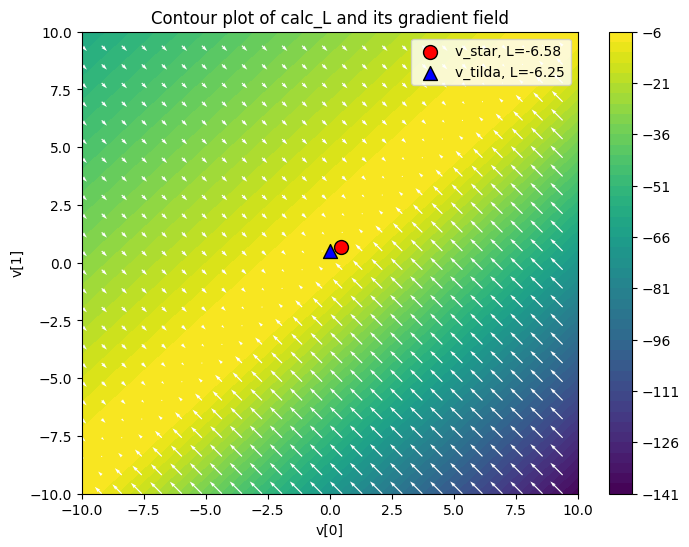

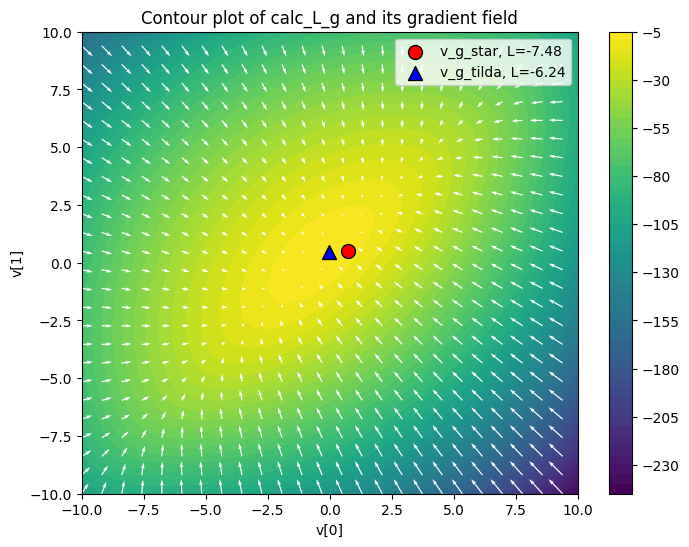

In [ ]:
def plot_L(data: GaoData, g_l: float):
    v_star = data.v
    v_tilda = calc_v_tilda(data)
    v_g_star = calc_v_g_star(data, g_l)
    v_g_tilda = calc_v_g_tilda(data, g_l)

    print("true v is ", data.v)
    print("grad at true", calc_L_grad(data, data.v))
    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L(data, v_point)
            grad = calc_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("Contour plot of L and its gradient field")

    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_tilda[0],
        v_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_tilda, L={calc_L(data, v_tilda):.2f}",
    )
    plt.legend()
    plt.show()

    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L_g(data, v_point, 1)
            grad = calc_L_g_grad(data, v_point, 1)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("Contour plot of L_g and its gradient field")

    plt.scatter(
        v_g_star[0],
        v_g_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_g_star, L={calc_L(data, v_g_star):.2f}",
    )
    plt.scatter(
        v_g_tilda[0],
        v_g_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_g_tilda, L={calc_L(data, v_g_tilda):.2f}",
    )
    plt.legend()
    plt.show()


plot_L(GaoData(2, 1, 10, (-1, 1)), 1)

In [ ]:
def N(F: np.ndarray) -> float:
    return


def plot_N():
    values = []
    for i in tqdm(range(10000)):
        data = GaoData(50, 0.2, 10, (-1, 1))

/Users/honeybadger/hse/btl/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10000/10000 [00:00<00:00, 43194.69it/s]


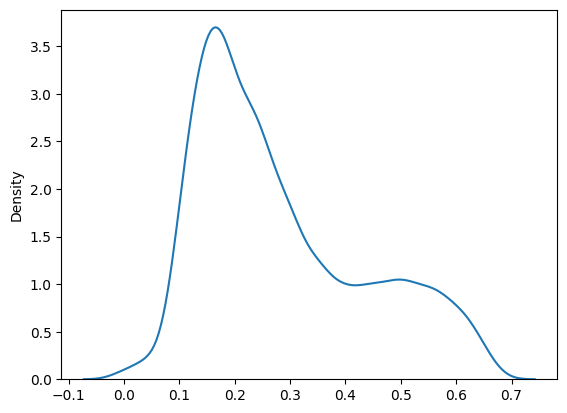

In [2]:
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


def plot_rho():
    values = []
    for i in tqdm(range(10000)):
        F = gen_F()
        g_l = 1
        values.append(rho_1(F, g_l))
    # add kde plot
    sns.kdeplot(values)


plot_rho()

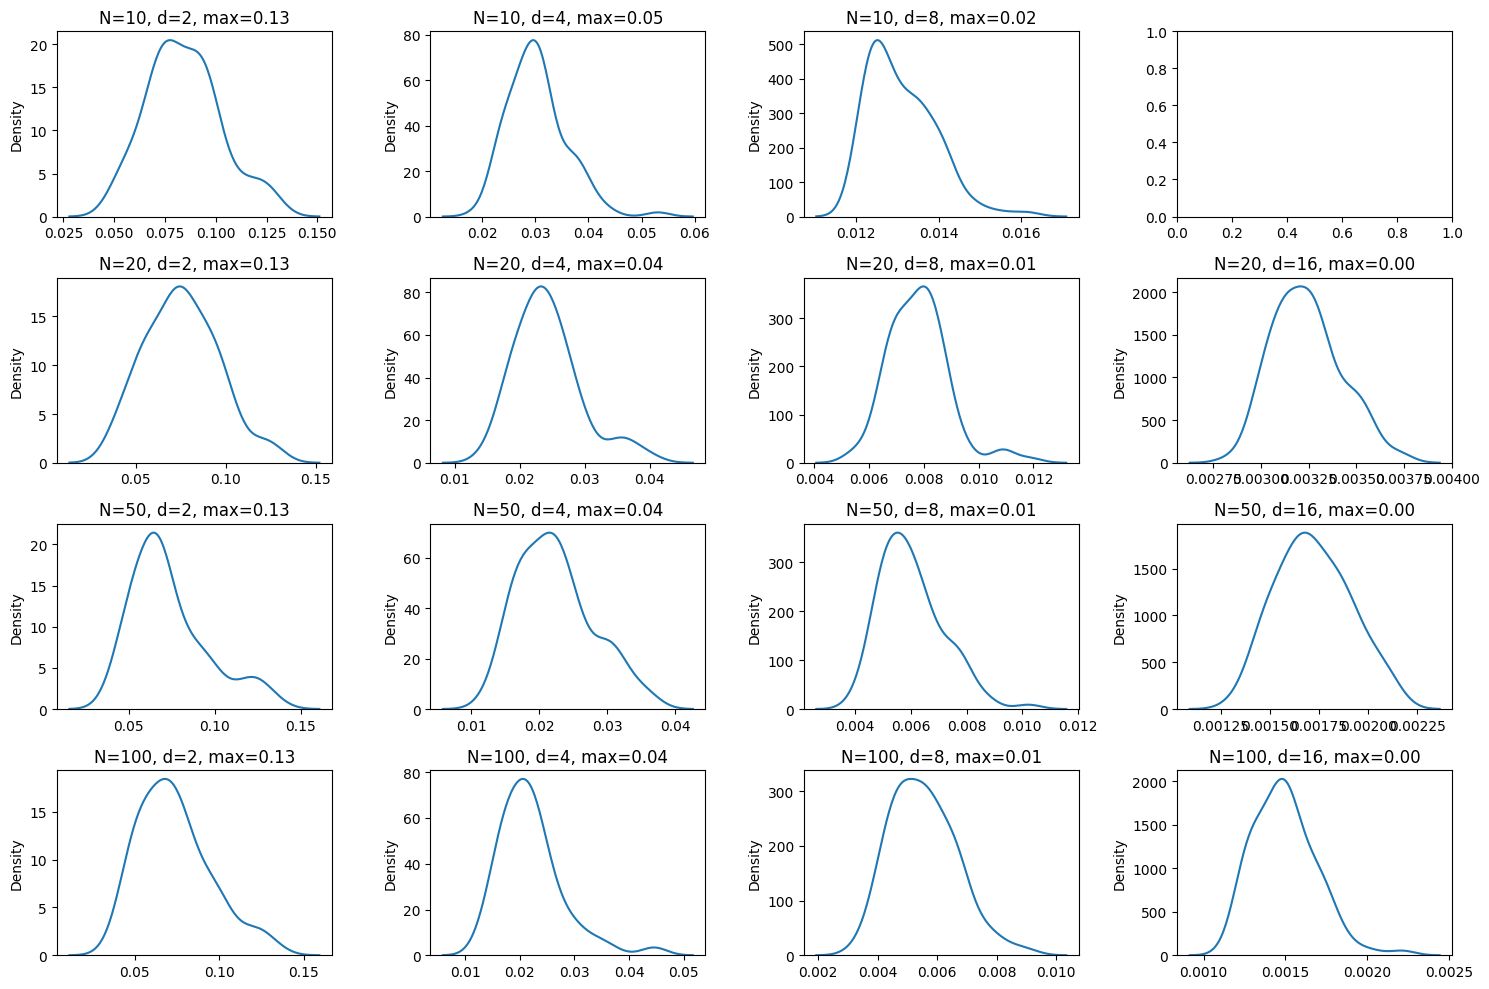

<function matplotlib.pyplot.show(close=None, block=None)>

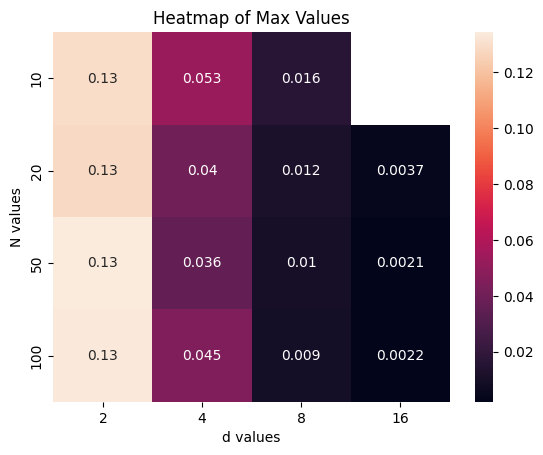

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


def plot_rho(N, L, d, R, g_l):
    values = []
    for i in range(100):
        F = gen_F_fixed(N, L, d, R)
        values.append(rho_1(F, g_l))
    # add kde plot
    sns.kdeplot(values)
    return values

    # Create a heatmap of the max values


N_values = [10, 20, 50, 100]
d_values = [2, 4, 8, 16]

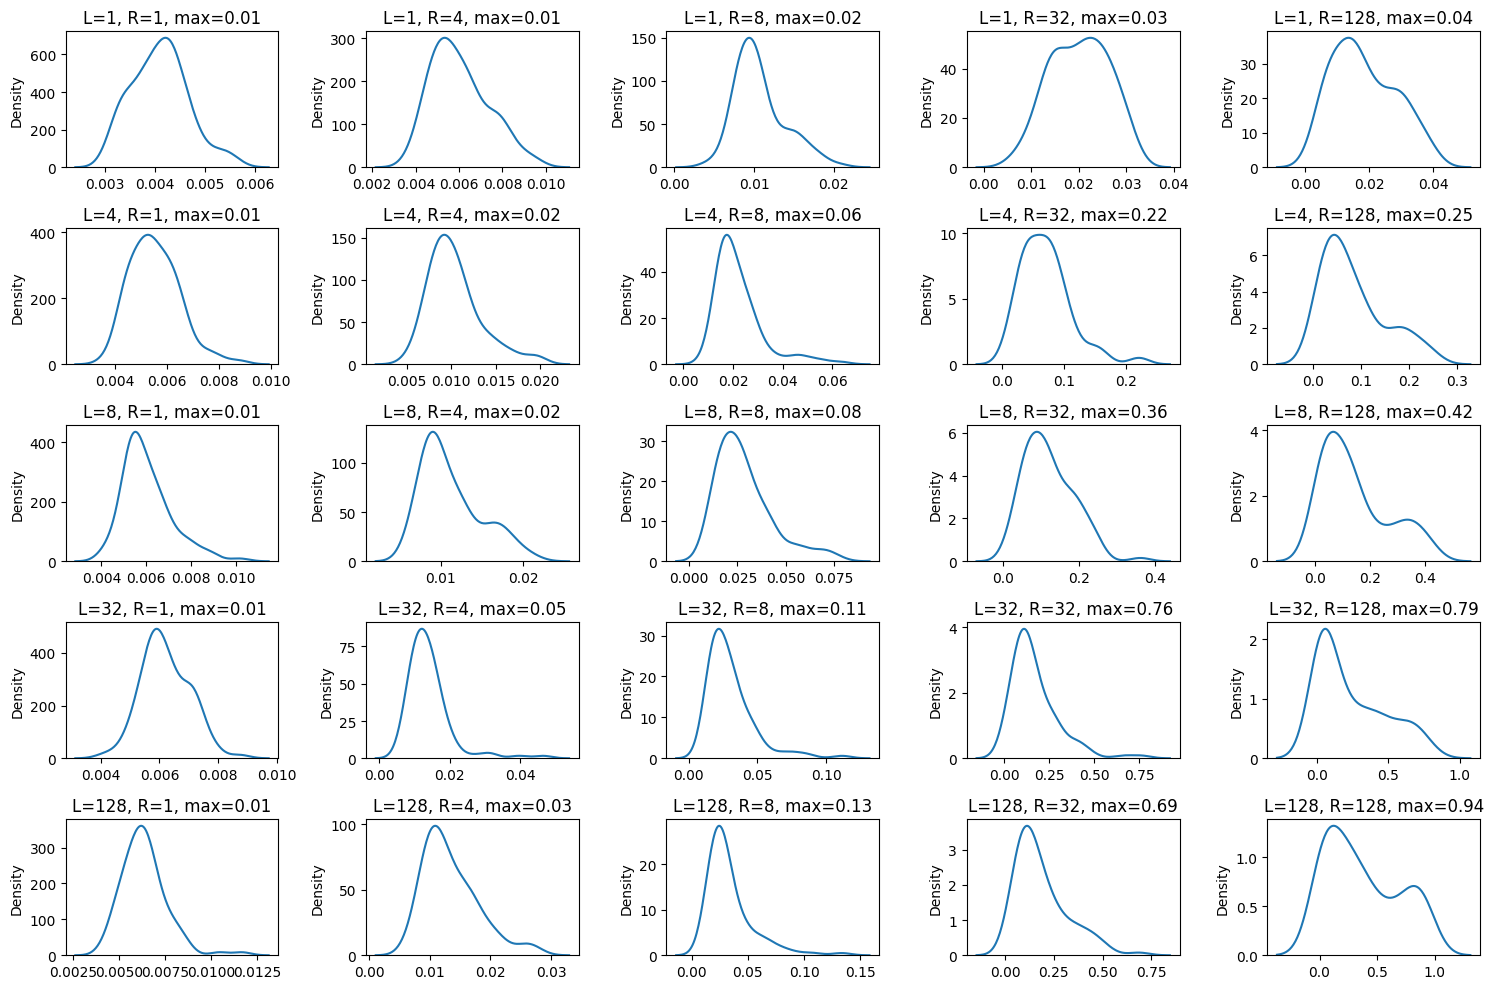

Text(50.722222222222214, 0.5, 'L values')

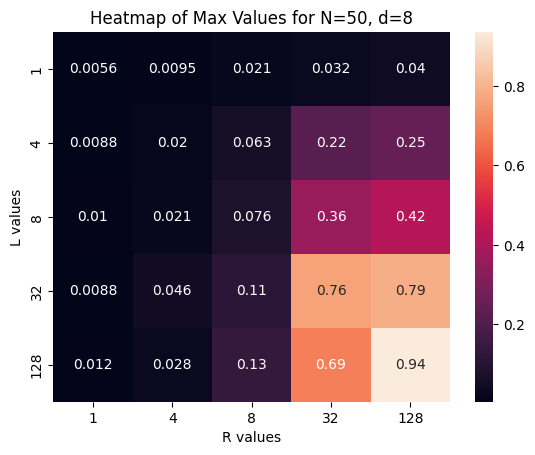

In [ ]:
N = 50
d = 8
L_values = [1, 4, 8, 32, 128]
R_values = [1, 4, 8, 32, 128]


fig, axes = plt.subplots(len(L_values), len(R_values), figsize=(15, 10))


max_values = np.zeros((len(L_values), len(R_values)))


for i, L in enumerate(L_values):
    for j, R in enumerate(R_values):
        plt.sca(axes[i, j])
        values = plot_rho(N, L, d, R, 1.0)
        max_values[i, j] = np.max(values)
        axes[i, j].set_title(f"L={L}, R={R}, max={np.max(values):.2f}")


plt.tight_layout()
plt.show()

sns.heatmap(max_values, annot=True, xticklabels=R_values, yticklabels=L_values)
plt.title("Heatmap of Max Values for N=50, d=8")
plt.xlabel("R values")
plt.ylabel("L values")

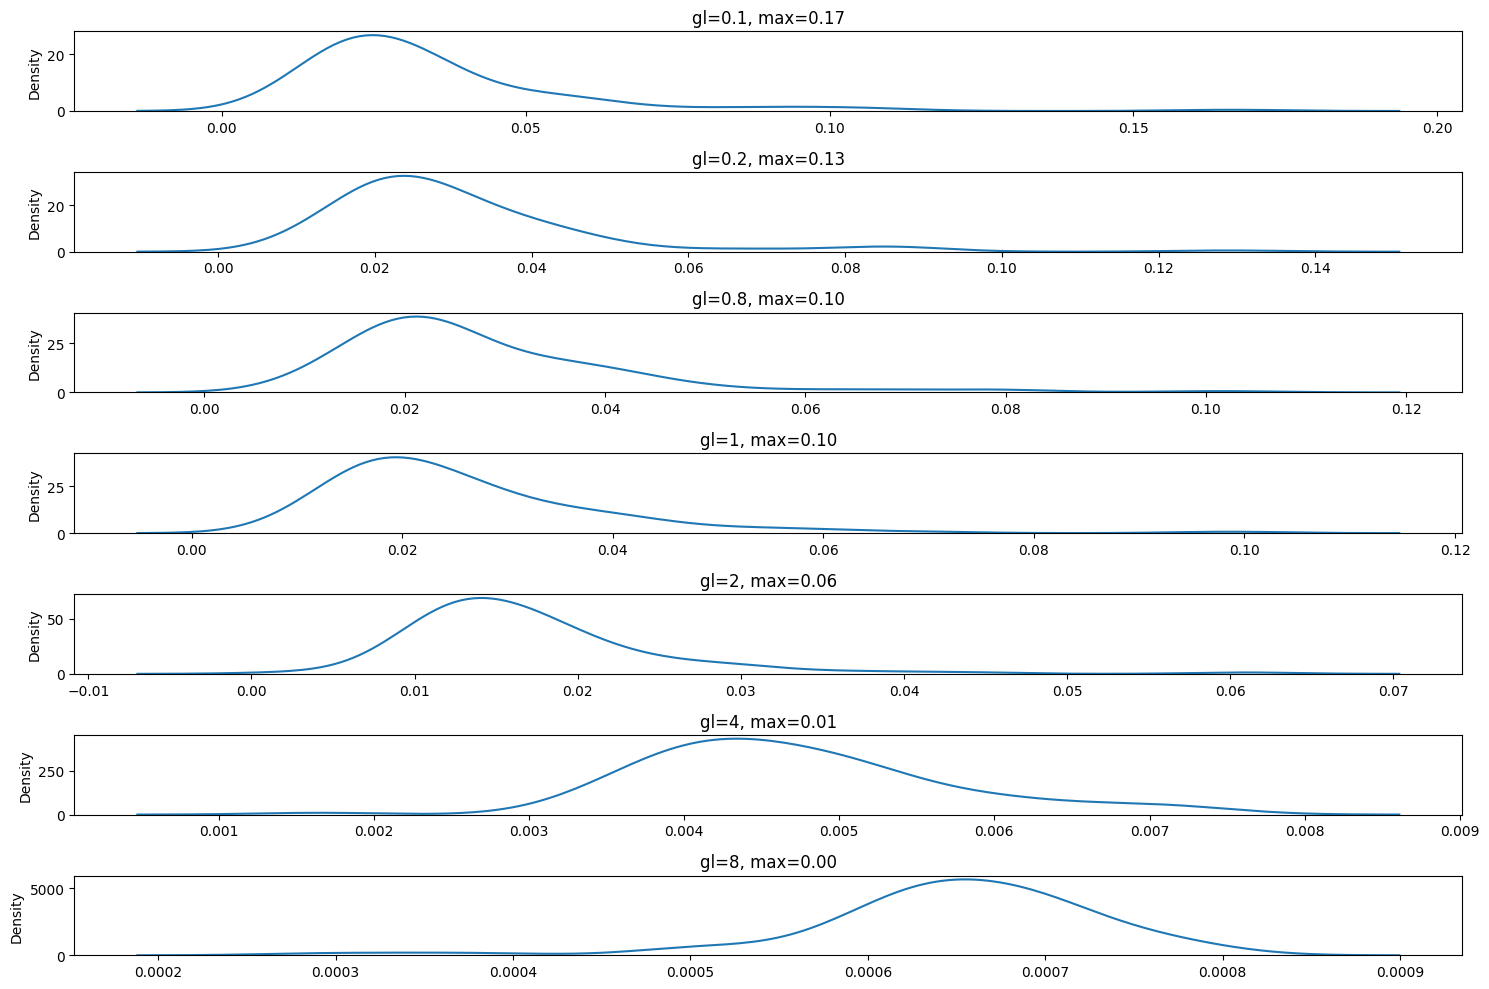

Text(50.722222222222214, 0.5, 'gl values')

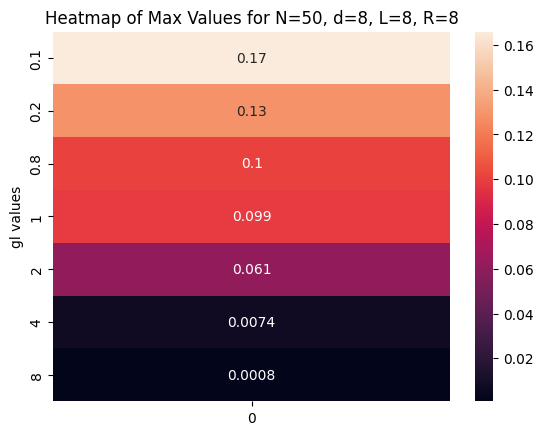

In [81]:
N = 50
d = 8
L = 8
R = 8


gl_values = [0.1, 0.2, 0.8, 1, 2, 4, 8]


fig, axes = plt.subplots(len(gl_values), 1, figsize=(15, 10))


max_values = np.zeros((len(gl_values), 1))


for i, gl in enumerate(gl_values):
    j = 0
    plt.sca(axes[i])
    values = plot_rho(N, L, d, R, gl)
    max_values[i, j] = np.max(values)
    axes[i].set_title(f"gl={gl}, max={np.max(values):.2f}")


plt.tight_layout()
plt.show()

sns.heatmap(max_values, annot=True, yticklabels=gl_values)
plt.title("Heatmap of Max Values for N=50, d=8, L=8, R=8")
plt.ylabel("gl values")